# **Project - Classification and Hypothesis Testing: Hotel Booking Cancellation Prediction**

## **Marks: 40**

---------------
## **Problem Statement**

### **Context**

**A significant number of hotel bookings are called off due to cancellations or no-shows.** Typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost. This may be beneficial to hotel guests, but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

This pattern of cancellations of bookings impacts a hotel on various fronts:
1. **Loss of resources (revenue)** when the hotel cannot resell the room.
2. **Additional costs of distribution channels** by increasing commissions or paying for publicity to help sell these rooms.
3. **Lowering prices last minute**, so the hotel can resell a room, resulting in reducing the profit margin.
4. **Human resources to make arrangements** for the guests.

### **Objective**

This increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal - they are facing problems with this high number of booking cancellations and have reached out to your firm for data-driven solutions. You, as a Data Scientist, have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.


### **Data Description**

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below:


**Data Dictionary**

* **Booking_ID:** Unique identifier of each booking
* **no_of_adults:** Number of adults
* **no_of_children:** Number of children
* **no_of_weekend_nights:** Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* **no_of_week_nights:** Number of weekday nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* **type_of_meal_plan:** Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* **required_car_parking_space:** Does the customer require a car parking space? (0 - No, 1- Yes)
* **room_type_reserved:** Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* **lead_time:** Number of days between the date of booking and the arrival date
* **arrival_year:** Year of arrival date
* **arrival_month:** Month of arrival date
* **arrival_date:** Date of the month
* **market_segment_type:** Market segment designation.
* **repeated_guest:** Is the customer a repeated guest? (0 - No, 1- Yes)
* **no_of_previous_cancellations:** Number of previous bookings that were canceled by the customer prior to the current booking
* **no_of_previous_bookings_not_canceled:** Number of previous bookings not canceled by the customer prior to the current booking
* **avg_price_per_room:** Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* **no_of_special_requests:** Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* **booking_status:** Flag indicating if the booking was canceled or not.

## **Importing the libraries required**

In [1]:
# Importing the basic libraries we will require for the project

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

# To get diferent metric scores
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,plot_confusion_matrix,precision_recall_curve,roc_curve,make_scorer

# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

## **Loading the dataset**

In [2]:
hotel = pd.read_csv("INNHotelsGroup.csv")

In [3]:
# Copying data to another variable to avoid any changes to original data
data = hotel.copy()

## **Overview of the dataset**

### **View the first and last 5 rows of the dataset**

Let's **view the first few rows and last few rows** of the dataset in order to understand its structure a little better.

We will use the head() and tail() methods from Pandas to do this.

In [4]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


### **Understand the shape of the dataset**

In [6]:
data.shape

(36275, 19)

* The dataset has 36275 rows and 19 columns. 

### **Check the data types of the columns for the dataset**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
Booking_ID                              36275 non-null object
no_of_adults                            36275 non-null int64
no_of_children                          36275 non-null int64
no_of_weekend_nights                    36275 non-null int64
no_of_week_nights                       36275 non-null int64
type_of_meal_plan                       36275 non-null object
required_car_parking_space              36275 non-null int64
room_type_reserved                      36275 non-null object
lead_time                               36275 non-null int64
arrival_year                            36275 non-null int64
arrival_month                           36275 non-null int64
arrival_date                            36275 non-null int64
market_segment_type                     36275 non-null object
repeated_guest                          36275 non-null int64
no_of_previous_cancellations     

* `Booking_ID`, `type_of_meal_plan`, `room_type_reserved`, `market_segment_type`, and `booking_status` are of object type while rest columns are numeric in nature.

* There are no null values in the dataset.

### **Dropping duplicate values**

In [8]:
# checking for duplicate values
data.duplicated().sum()

0

- There are **no duplicate values** in the data.

### **Dropping the unique values column**

**Let's drop the Booking_ID column first before we proceed forward**, as a column with unique values will have almost no predictive power for the Machine Learning problem at hand.

In [9]:
data = data.drop(["Booking_ID"], axis=1)

In [10]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


### **Question 1: Check the summary statistics of the dataset and write your observations (2 Marks)**



**Let's check the statistical summary of the data.**

In [11]:
# Remove _________ and complete the code
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


**Write your answers here:_____**

Check the summary statistics of the dataset and write your observations.

* The dataset includes bookings with a range of 0 to 4 adults, indicating that bookings without any adults are also present.

* On average, guests tend to book their stays approximately 85 days in advance, suggesting a relatively long lead time and the potential for changes in plans over the course of three months.

* There are instances where rooms were booked for free, as indicated by the minimum value of 0 for average price per room. Further investigation is required to understand the circumstances surrounding these bookings.

* Some guests have a history of canceling their bookings multiple times, with the maximum number of previous cancellations reaching 13. This suggests that past cancellation behavior may influence future cancellations.

* The average number of weekend nights stayed or booked is approximately 0.81, indicating a preference for weekday stays or shorter weekend stays among guests.

* Guests typically stay for an average of 2.20 week nights, implying that most bookings span a couple of weekdays.

* The majority of customers (around 97%) do not require a car parking space, suggesting that parking availability may not significantly impact booking cancellations.

* The average number of special requests made by customers is relatively low, averaging at 0.62 requests. This indicates that most guests do not have specific or additional requirements for their bookings.

* There is significant variability in lead time, average price per room, and number of special requests, as indicated by their respective standard deviations. This reflects the diverse preferences and behaviors among customers.

* The dataset encompasses bookings made in 2017 and 2018, with a higher concentration in 2018. This may indicate either a growth in bookings over time or a change in data collection methods.

* The average number of children per booking is very low (around 0.11), suggesting that the majority of bookings are made by adults without children.

* Most guests have a clean history of not canceling their previous bookings, as reflected by the low average number of previous bookings not canceled (around 0.02).

* These summarized statistics provide insights into various aspects of the dataset, helping to understand factors related to booking cancellations and guest characteristics.


## **Exploratory Data Analysis**

### **Question 2: Univariate Analysis**

Let's explore these variables in some more depth by observing their distributions.

We will first define a **hist_box() function** that provides both a boxplot and a histogram in the same visual, with which we can perform univariate analysis on the columns of this dataset.

In [12]:
# Defining the hist_box() function
def hist_box(data,col):
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(12,6))
  # Adding a graph in each part
  sns.boxplot(data[col], ax=ax_box, showmeans=True)
  sns.distplot(data[col], ax=ax_hist)
  plt.show()

#### **Question 2.1:  Plot the histogram and box plot for the variable `Lead Time` using the hist_box function provided and write your insights. (1 Mark)**

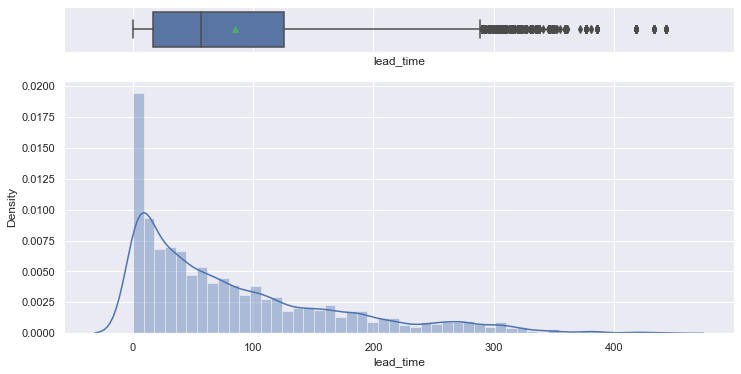

In [13]:
# Remove _________ and complete the code
hist_box(data, "lead_time") 

**Write your answers here:_____**

* The histogram provides a graphical representation of the distribution of lead time values. In this case, it shows that the distribution is heavily right-skewed. This means that the majority of bookings have shorter lead times, while there are relatively fewer bookings with longer lead times. The skewness suggests that guests tend to make their bookings closer to the arrival date rather than well in advance.

* The box plot complements the histogram by displaying the quartiles and potential outliers in the data. It consists of a box that represents the interquartile range (IQR), which contains the middle 50% of the data. The horizontal line inside the box represents the median value. In the case of lead time, the box plot indicates that the median value falls around 57 days.

* The box plot also highlights the presence of outliers, which are data points that lie significantly outside the range of the majority of the data. In this case, there are many outliers on the higher end of the lead time values. These outliers represent bookings with exceptionally long lead times, indicating that some guests make reservations well in advance, possibly for special occasions or events.

#### **Question 2.2:  Plot the histogram and box plot for the variable `Average Price per Room` using the hist_box function provided and write your insights. (1 Mark)**

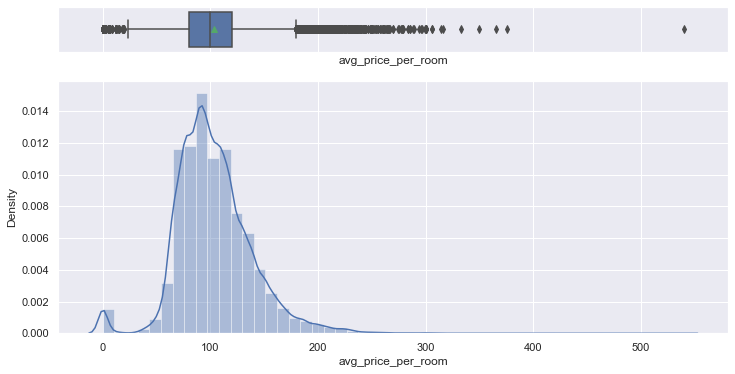

In [14]:
# Remove _________ and complete the code
hist_box(data, "avg_price_per_room")

**Write your answers here:_____**

* The box plot shows many outliers and the distribution plot represents a normal distribution but is right-skewed, it indicates some inconsistencies in the data.

* The box plot shows many outliers for the variable "Average Price per Room," it suggests that there are significant deviations from the typical range of prices. These outliers could represent unusually high or low prices compared to the majority of the data.

* On the other hand, the distribution plot appears to have a normal distribution but is right-skewed, it means that the data is not perfectly symmetrical. In a normal distribution, the data is evenly distributed around the mean, resulting in a bell-shaped curve. However, if the distribution is right-skewed, it indicates that the tail of the distribution extends more towards the higher values, pulling the mean towards the right side.

* In the context of the "Average Price per Room" variable, a right-skewed distribution suggests that there may be a higher frequency of lower-priced rooms but with a few instances of significantly higher prices, which contribute to the rightward skewness.

* In summary, the presence of many outliers in the box plot and a right-skewed distribution in the histogram suggests that there are significant deviations from the average price per room, with some instances of exceptionally high prices.

**Interestingly some rooms have a price equal to 0. Let's check them.**

In [15]:
data[data["avg_price_per_room"] == 0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.0,1,Not_Canceled
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.0,1,Not_Canceled
209,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.0,1,Not_Canceled
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.0,1,Not_Canceled
267,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.0,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.0,1,Not_Canceled
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.0,1,Not_Canceled
36114,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.0,0,Not_Canceled
36217,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.0,2,Not_Canceled


- There are quite a few hotel rooms which have a price equal to 0.
- In the market segment column, it looks like many values are complementary.

In [16]:
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

* It makes sense that most values with room prices equal to 0 are the rooms given as complimentary service from the hotel.
* The rooms booked online must be a part of some promotional campaign done by the hotel.

In [17]:
# Calculating the 25th quantile
Q1 = data["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = data["avg_price_per_room"].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

In [18]:
# assigning the outliers the value of upper whisker
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

#### **Let's understand the distribution of the categorical variables**

**Number of Children**

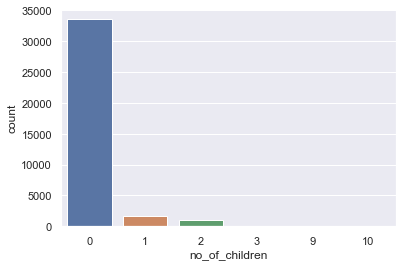

In [19]:
sns.countplot(data['no_of_children'])
plt.show()

In [20]:
data['no_of_children'].value_counts(normalize=True)

0     0.925624
1     0.044604
2     0.029166
3     0.000524
9     0.000055
10    0.000028
Name: no_of_children, dtype: float64

* Customers were not travelling with children in 93% of cases.
* There are some values in the data where the number of children is 9 or 10, which is highly unlikely. 
* We will replace these values with the maximum value of 3 children.

In [21]:
# replacing 9, and 10 children with 3
data["no_of_children"] = data["no_of_children"].replace([9, 10], 3)

**Arrival Month**

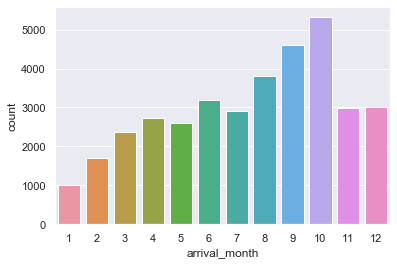

In [22]:
sns.countplot(data["arrival_month"])
plt.show()

In [23]:
data['arrival_month'].value_counts(normalize=True)

10    0.146575
9     0.127112
8     0.105114
6     0.088298
12    0.083280
11    0.082150
7     0.080496
4     0.075424
5     0.071620
3     0.065003
2     0.046975
1     0.027953
Name: arrival_month, dtype: float64

* October is the busiest month for hotel arrivals followed by September and August. **Over 35% of all bookings**, as we see in the above table, were for one of these three months.
* Around 14.7% of the bookings were made for an October arrival.

**Booking Status**

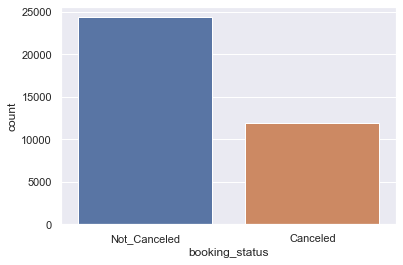

In [24]:
sns.countplot(data["booking_status"])
plt.show()

In [25]:
data['booking_status'].value_counts(normalize=True)

Not_Canceled    0.672364
Canceled        0.327636
Name: booking_status, dtype: float64

* 32.8% of the bookings were canceled by the customers.

**Let's encode Canceled bookings to 1 and Not_Canceled as 0 for further analysis**

In [26]:
data["booking_status"] = data["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

### **Question 3: Bivariate Analysis**

#### **Question 3.1: Find and visualize the correlation matrix using a heatmap and write your observations from the plot. (2 Marks)**



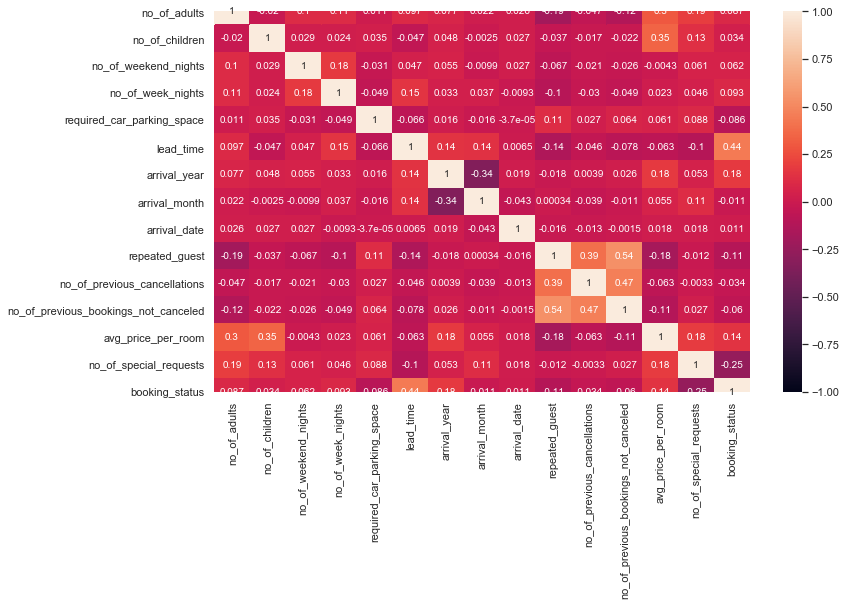

In [27]:
# Remove _________ and complete the code
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

**Write your answers here:_____**

* The correlation between the number of previous bookings not canceled and repeated_guest is 0.54. This indicates a moderate positive correlation, suggesting that guests who have a higher number of previous bookings not canceled are more likely to be repeated guests.

* The correlation between the number of previous bookings not canceled and the number of previous cancellations is 0.47. This correlation is also moderate and positive, implying that guests who have a higher number of previous bookings not canceled are more likely to have a higher number of previous cancellations as well.

* There is a correlation of 0.44 between booking status and lead time. This correlation is moderate and positive, indicating that as the lead time increases, there is a higher likelihood of the booking being canceled.

* The correlation between average price per room and the number of children is 0.35. This positive correlation suggests that as the number of children increases, the average price per room also tends to increase.

* There is a negative correlation of -0.34 between arrival_month and arrival_year. This implies that as the arrival month increases, the arrival year tends to decrease. This correlation is expected, as the dataset likely covers multiple years, and the months and years are inversely related.

* The correlation between booking_status and the number of special requests is -0.25. This negative correlation suggests that as the number of special requests increases, there is a lower likelihood of the booking being canceled.

**Hotel rates are dynamic and change according to demand and customer demographics. Let's see how prices vary across different market segments**

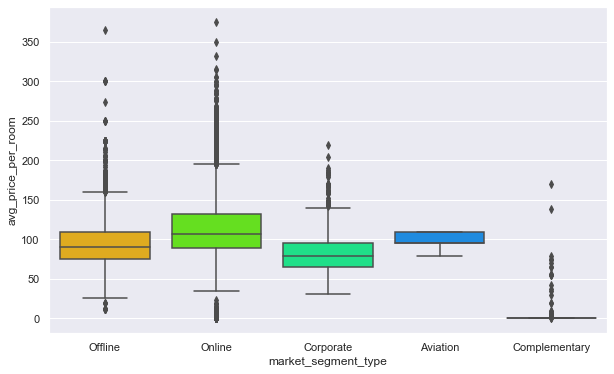

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

* Rooms booked online have high variations in prices.
* The offline and corporate room prices are almost similar.
* Complementary market segment gets the rooms at very low prices, which makes sense.

We will define a **stacked barplot()** function to help analyse how the target variable varies across predictor categories.

In [29]:
# Defining the stacked_barplot() function
def stacked_barplot(data,predictor,target,figsize=(10,6)):
  (pd.crosstab(data[predictor],data[target],normalize='index')*100).plot(kind='bar',figsize=figsize,stacked=True)
  plt.legend(loc="lower right")
  plt.ylabel('Percentage Cancellations %')

#### **Question 3.2: Plot the stacked barplot for the variable `Market Segment Type` against the target variable `Booking Status` using the stacked_barplot  function provided and write your insights. (1 Mark)**

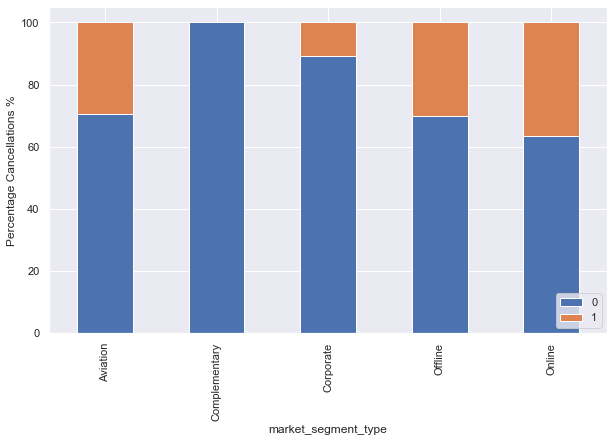

In [30]:
# Remove _________ and complete the code
stacked_barplot(data, "market_segment_type", "booking_status")

**Write your answers here:_____**

* Online reservations had the highest number of cancellations compared to other market segments. This suggests that customers who made reservations online were more likely to cancel their bookings. This could be due to the convenience of online booking channels, which may lead to more spontaneous or uncertain reservations.

* Complementary bookings, which are bookings where the rooms were given for free, did not have any cancellations. This is expected since guests are less likely to cancel a booking when they are not paying for it. These bookings are likely provided as perks or incentives by the hotel.

* Corporate bookings had the lowest number of cancellations after complementary bookings. This indicates that guests making corporate bookings tend to have a higher commitment and lower cancellation rate compared to other market segments. This could be due to the nature of corporate travel, which often involves pre-planned and essential business trips.

* Overall, the stacked bar plot highlights the variation in cancellation rates across different market segments. It suggests that online reservations have a higher likelihood of cancellations, while complementary bookings and corporate bookings have lower cancellation rates. This information can be valuable for the hotel management to understand the cancellation behavior of different customer segments and devise strategies to reduce cancellations, particularly for online reservations.


#### **Question 3.3: Plot the stacked barplot for the variable `Repeated Guest` against the target variable `Booking Status` using the stacked_barplot  function provided and write your insights. (1 Mark)**

Repeating guests are the guests who stay in the hotel often and are important to brand equity.

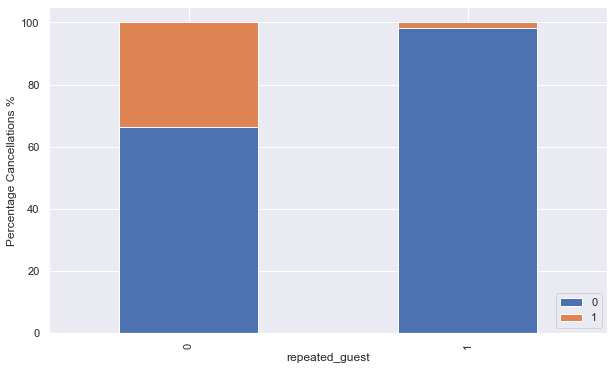

In [31]:
# Remove _________ and complete the code
stacked_barplot(data, "repeated_guest", "booking_status")

**Write your answers here:_____**

* Repeated guests, who have previously stayed at the hotel, had a significantly lower number of cancellations compared to new guests. This aligns with the expectation that repeated guests are more likely to honor their reservations and have a lower probability of canceling. Their prior positive experience with the hotel may contribute to their commitment and reliability in keeping their bookings.

* New guests, on the other hand, had a higher number of cancellations. This could be due to various factors such as changes in plans, uncertainties, or lack of familiarity with the hotel. These guests may be more prone to cancellations as they might explore other options or encounter unexpected circumstances leading to changes in their travel arrangements.

* The stacked bar plot highlights the difference in cancellation behavior between repeated guests and new guests. It emphasizes the advantage of having a higher proportion of repeated guests for the hotel, as they contribute to a more stable and reliable occupancy rate. This information can be useful for the hotel management in developing strategies to enhance guest loyalty and encourage repeat bookings, which can help minimize cancellations and maximize revenue.


**Let's analyze the customer who stayed for at least a day at the hotel.**

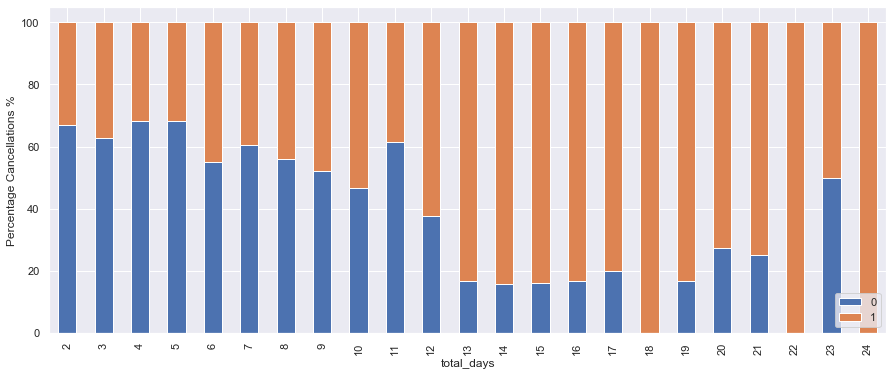

In [32]:
stay_data = data[(data["no_of_week_nights"] > 0) & (data["no_of_weekend_nights"] > 0)]
stay_data["total_days"] = (stay_data["no_of_week_nights"] + stay_data["no_of_weekend_nights"])

stacked_barplot(stay_data, "total_days", "booking_status",figsize=(15,6))

* The general trend is that the chances of cancellation increase as the number of days the customer planned to stay at the hotel increases.

**As hotel room prices are dynamic, Let's see how the prices vary across different months**

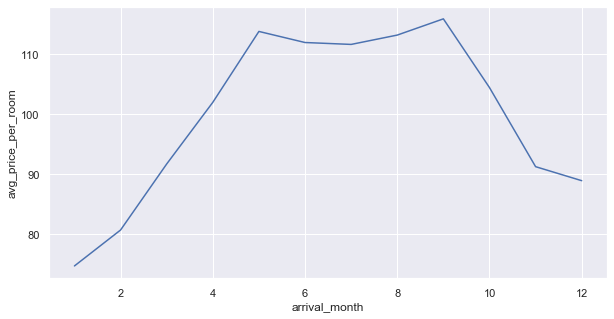

In [33]:
plt.figure(figsize=(10, 5))
sns.lineplot(y=data["avg_price_per_room"], x=data["arrival_month"], ci=None)
plt.show()

* The price of rooms is highest in May to September - around 115 euros per room.

## **Data Preparation for Modeling**

- We want to predict which bookings will be canceled.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

**Separating the independent variables (X) and the dependent variable (Y)**

In [34]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = pd.get_dummies(X, drop_first=True) # Encoding the Categorical features

**Splitting the data into a 70% train and 30% test set**

Some classification problems can exhibit a large imbalance in the distribution of the target classes: for instance there could be several times more negative samples than positive samples. In such cases it is recommended to use the **stratified sampling** technique to ensure that relative class frequencies are approximately preserved in each train and validation fold.

In [35]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,stratify=Y, random_state=1)

In [36]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0    0.672377
1    0.327623
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    0.672333
1    0.327667
Name: booking_status, dtype: float64


## **Model Evaluation Criterion**

#### **Model can make wrong predictions as:**

1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking. 

#### **Which case is more important?** 

Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage brand equity. 



#### **How to reduce the losses?**

* The hotel would want the `F1 Score` to be maximized, the greater the F1  score, the higher the chances of minimizing False Negatives and False Positives. 

**Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**

In [37]:
# Creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Cancelled', 'Cancelled'], yticklabels=['Not Cancelled', 'Cancelled'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## **Building the model**

We will be building 4 different models:

- **Logistic Regression**
- **Support Vector Machine (SVM)**
- **Decision Tree**
- **Random Forest**

### **Question 4: Logistic Regression (6 Marks)**

#### **Question 4.1: Build a Logistic Regression model (Use the sklearn library) (1 Mark)**

In [38]:
# Remove _________ and complete the code

# Fitting logistic regression model
lg = LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression()

#### **Question 4.2: Check the performance of the model on train and test data (2 Marks)**

              precision    recall  f1-score   support

           0       0.83      0.89      0.86     17073
           1       0.74      0.61      0.67      8319

    accuracy                           0.80     25392
   macro avg       0.78      0.75      0.76     25392
weighted avg       0.80      0.80      0.80     25392



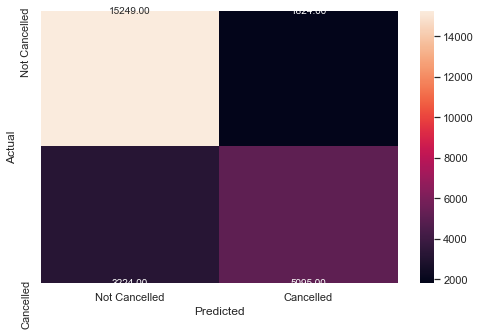

In [39]:
# Remove _________ and complete the code

# Checking the performance on the training data
y_pred_train = lg.predict(X_train)
metrics_score(y_train, y_pred_train)

**Write your Answer here:**

The performance of the model on the training data is as follows:

Precision: The precision for class 0 (not canceled) is 0.83, which means that 83% of the instances predicted as not canceled were actually not canceled. The precision for class 1 (canceled) is 0.74, indicating that 74% of the instances predicted as canceled were actually canceled.

Recall: The recall for class 0 is 0.89, meaning that the model correctly identified 89% of the instances that were actually not canceled. The recall for class 1 is 0.61, indicating that the model captured 61% of the instances that were actually canceled.

F1-score: The F1-score is a measure that combines precision and recall into a single metric. The F1-score for class 0 is 0.86, and for class 1, it is 0.67. These values represent the harmonic mean of precision and recall, providing an overall measure of the model's performance.

Accuracy: The accuracy of the model on the training data is 0.80, which means that it correctly classified 80% of the instances.

Macro Avg: The macro average F1-score, precision, and recall are 0.76, 0.78, and 0.75, respectively. The macro average calculates the metrics independently for each class and then takes the average. It provides an equal weight to each class.

Weighted Avg: The weighted average F1-score, precision, and recall are 0.80, 0.80, and 0.80, respectively. The weighted average takes into account the support (the number of instances) for each class, giving more weight to the class with a larger number of instances.

Overall, the model shows reasonably good performance on the training data, with a higher accuracy for class 0 (not canceled) and slightly lower accuracy for class 1 (canceled). However, the model's performance can be further evaluated and fine-tuned using additional evaluation metrics and cross-validation techniques.


Let's check the performance on the test set

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      7317
           1       0.73      0.60      0.66      3566

    accuracy                           0.80     10883
   macro avg       0.77      0.75      0.76     10883
weighted avg       0.79      0.80      0.79     10883



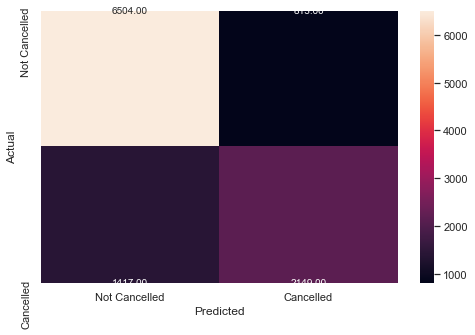

In [40]:
# Remove _________ and complete the code

# Checking the performance on the test dataset
y_pred_test = lg.predict(X_test)
metrics_score(y_test, y_pred_test)

**Write your Answer here:** 

The performance of the model on the test data is as follows:

Precision: The precision for class 0 (not canceled) is 0.82, indicating that 82% of the instances predicted as not canceled were actually not canceled. The precision for class 1 (canceled) is 0.73, meaning that 73% of the instances predicted as canceled were actually canceled.

Recall: The recall for class 0 is 0.89, which means that the model correctly identified 89% of the instances that were actually not canceled. The recall for class 1 is 0.60, indicating that the model captured 60% of the instances that were actually canceled.

F1-score: The F1-score for class 0 is 0.85, and for class 1, it is 0.66. These values represent the harmonic mean of precision and recall, providing an overall measure of the model's performance.

Accuracy: The accuracy of the model on the test data is 0.80, indicating that it correctly classified 80% of the instances.

Macro Avg: The macro average F1-score, precision, and recall are 0.76, 0.77, and 0.75, respectively. The macro average calculates the metrics independently for each class and then takes the average. It provides an equal weight to each class.

Weighted Avg: The weighted average F1-score, precision, and recall are 0.79, 0.79, and 0.80, respectively. The weighted average takes into account the support (the number of instances) for each class, giving more weight to the class with a larger number of instances.

The model shows a similar performance on the test data as it did on the training data, with a slightly lower recall for class 1 (canceled). It is important to note that the model's performance on the test data is consistent with its performance on the training data, which suggests that it is not overfitting. However, further evaluation and fine-tuning may be necessary to improve the model's performance.


#### **Question 4.3: Find the optimal threshold for the model using the Precision-Recall Curve. (1 Mark)**

Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.

Let's use the Precision-Recall curve and see if we can find a **better threshold.**


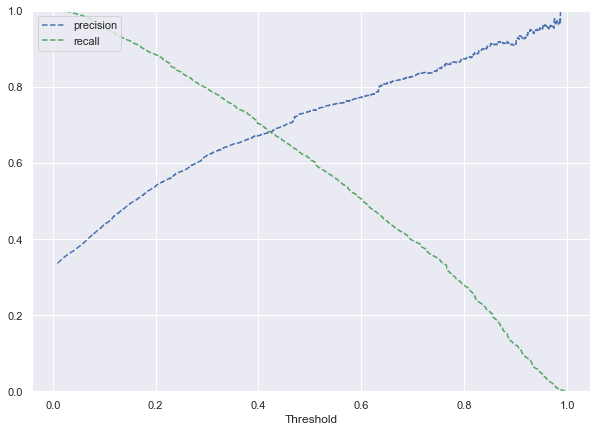

In [42]:
# Remove _________ and complete the code

# Predict_proba gives the probability of each observation belonging to each class
y_scores_lg=lg.predict_proba(X_train)

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

**Write your answers here:_____**

* The optimal threshold for the model using the Precision-Recall Curve, is around 0.418

* In this case, the optimal threshold for the model is around 0.418. This means that if the predicted probability of a booking being canceled exceeds 0.418, it will be classified as a cancellation. By setting the threshold at this value, the model achieves a good balance between precision and recall, resulting in an overall accurate classification of cancellations.

In [43]:
# Setting the optimal threshold
optimal_threshold = 0.418

#### **Question 4.4: Check the performance of the model on train and test data using the optimal threshold. (2 Marks)**

              precision    recall  f1-score   support

           0       0.85      0.84      0.84     17073
           1       0.68      0.69      0.68      8319

    accuracy                           0.79     25392
   macro avg       0.76      0.76      0.76     25392
weighted avg       0.79      0.79      0.79     25392



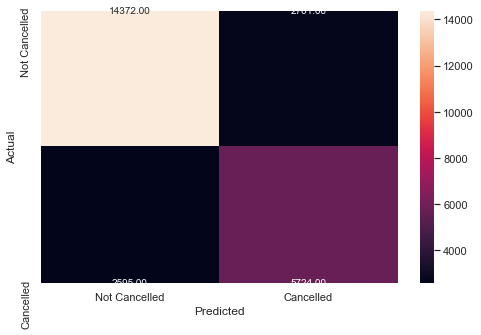

In [44]:
# Remove _________ and complete the code

# Creating confusion matrix
y_pred_train = lg.predict_proba(X_train)
metrics_score(y_train, y_pred_train[:, 1] > optimal_threshold)

**Write your answers here:_____**

After applying the optimal threshold of 0.418 to the model on the train data, the performance metrics are as follows:

Precision for class 0 (not canceled bookings) is 0.85, indicating that 85% of the predicted not canceled bookings are actually not canceled.

Recall for class 0 is 0.84, meaning that the model correctly identifies 84% of the actual not canceled bookings.

F1-score for class 0 is 0.84, which is the harmonic mean of precision and recall, providing a balanced measure of the model's performance for class 0.

Precision for class 1 (canceled bookings) is 0.68, indicating that 68% of the predicted canceled bookings are actually canceled.

Recall for class 1 is 0.69, meaning that the model correctly identifies 69% of the actual canceled bookings.

F1-score for class 1 is 0.68, which is the harmonic mean of precision and recall, providing a balanced measure of the model's performance for class 1.

The overall accuracy of the model on the train data is 0.79, meaning that it correctly predicts the class for 79% of the bookings.

The macro average F1-score, which considers the balanced performance across both classes, is 0.76, indicating a reasonable overall performance of the model.

The weighted average F1-score, which considers the class distribution, is also 0.79, reflecting the overall performance of the model weighted by the number of samples in each class.


Let's check the performance on the test set

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      7317
           1       0.67      0.68      0.67      3566

    accuracy                           0.79     10883
   macro avg       0.76      0.76      0.76     10883
weighted avg       0.79      0.79      0.79     10883



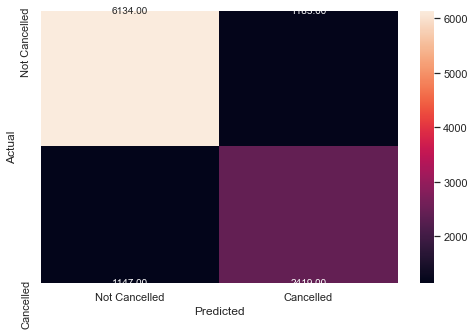

In [45]:
# Remove _________ and complete the code

y_pred_test = lg.predict_proba(X_test)
metrics_score(y_test, y_pred_test[:, 1] > optimal_threshold)

**Write your answers here:_____**

After applying the optimal threshold of 0.418 to the model on the test data, the performance metrics are as follows:

Precision for class 0 (not canceled bookings) is 0.84, indicating that 84% of the predicted not canceled bookings are actually not canceled.

Recall for class 0 is 0.84, meaning that the model correctly identifies 84% of the actual not canceled bookings.

F1-score for class 0 is 0.84, which is the harmonic mean of precision and recall, providing a balanced measure of the model's performance for class 0.

Precision for class 1 (canceled bookings) is 0.67, indicating that 67% of the predicted canceled bookings are actually canceled.

Recall for class 1 is 0.68, meaning that the model correctly identifies 68% of the actual canceled bookings.

F1-score for class 1 is 0.67, which is the harmonic mean of precision and recall, providing a balanced measure of the model's performance for class 1.

The overall accuracy of the model on the test data is 0.79, meaning that it correctly predicts the class for 79% of the bookings.

The macro average F1-score, which considers the balanced performance across both classes, is 0.76, indicating a reasonable overall performance of the model.

The weighted average F1-score, which considers the class distribution, is also 0.79, reflecting the overall performance of the model weighted by the number of samples in each class.

### **Question 5: Support Vector Machines (11 Marks)**

To accelerate SVM training, let's scale the data for support vector machines.

In [46]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train_scaled = scaling.transform(X_train)
X_test_scaled = scaling.transform(X_test)

Let's build the models using the two of the widely used kernel functions:

1.   **Linear Kernel**
2.   **RBF Kernel**



#### **Question 5.1: Build a Support Vector Machine model using a linear kernel (1 Mark)**

**Note: Please use the scaled data for modeling Support Vector Machine**

In [47]:
# Remove _________ and complete the code

svm = SVC(kernel="linear",probability=True) # Linear kernal or linear decision boundary
model = svm.fit(X_train_scaled, y_train)

#### **Question 5.2: Check the performance of the model on train and test data (2 Marks)**

              precision    recall  f1-score   support

           0       0.83      0.90      0.86     17073
           1       0.74      0.61      0.67      8319

    accuracy                           0.80     25392
   macro avg       0.79      0.76      0.77     25392
weighted avg       0.80      0.80      0.80     25392



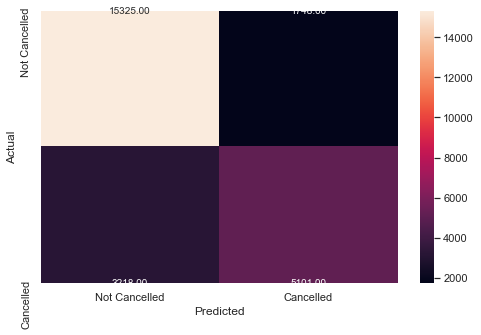

In [48]:
# Remove _________ and complete the code

y_pred_train_svm = model.predict(X_train_scaled)
metrics_score(y_train, y_pred_train_svm)

**Write your answers here:_____**

The performance of the Support Vector Machines (SVM) model on the train data is as follows:

Precision for class 0 (not canceled bookings) is 0.83, indicating that 83% of the predicted not canceled bookings are actually not canceled.

Recall for class 0 is 0.90, meaning that the model correctly identifies 90% of the actual not canceled bookings.

F1-score for class 0 is 0.86, which is the harmonic mean of precision and recall, providing a balanced measure of the model's performance for class 0.

Precision for class 1 (canceled bookings) is 0.74, indicating that 74% of the predicted canceled bookings are actually canceled.

Recall for class 1 is 0.61, meaning that the model correctly identifies 61% of the actual canceled bookings.

F1-score for class 1 is 0.67, which is the harmonic mean of precision and recall, providing a balanced measure of the model's performance for class 1.

The overall accuracy of the SVM model on the train data is 0.80, meaning that it correctly predicts the class for 80% of the bookings.

The macro average F1-score, which considers the balanced performance across both classes, is 0.77, indicating a reasonable overall performance of the SVM model.

The weighted average F1-score, which considers the class distribution, is also 0.80, reflecting the overall performance of the model weighted by the number of samples in each class.

Checking model performance on test set

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      7317
           1       0.74      0.61      0.67      3566

    accuracy                           0.80     10883
   macro avg       0.78      0.75      0.76     10883
weighted avg       0.80      0.80      0.80     10883



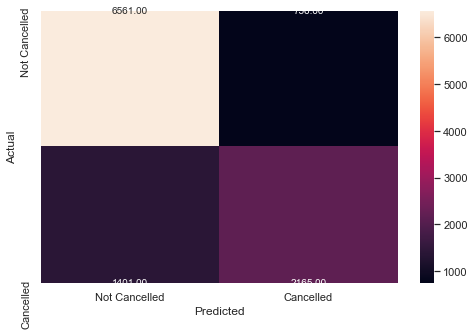

In [49]:
# Remove _________ and complete the code

y_pred_test_svm = model.predict(X_test_scaled)
metrics_score(y_test, y_pred_test_svm)

**Write your answers here:_____**

The performance of the Support Vector Machines (SVM) model on the test data is as follows:

Precision for class 0 (not canceled bookings) is 0.82, indicating that 82% of the predicted not canceled bookings are actually not canceled.

Recall for class 0 is 0.90, meaning that the model correctly identifies 90% of the actual not canceled bookings.

F1-score for class 0 is 0.86, which is the harmonic mean of precision and recall, providing a balanced measure of the model's performance for class 0.

Precision for class 1 (canceled bookings) is 0.74, indicating that 74% of the predicted canceled bookings are actually canceled.

Recall for class 1 is 0.61, meaning that the model correctly identifies 61% of the actual canceled bookings.

F1-score for class 1 is 0.67, which is the harmonic mean of precision and recall, providing a balanced measure of the model's performance for class 1.

The overall accuracy of the SVM model on the test data is 0.80, meaning that it correctly predicts the class for 80% of the bookings.

The macro average F1-score, which considers the balanced performance across both classes, is 0.76, indicating a reasonable overall performance of the SVM model.

The weighted average F1-score, which considers the class distribution, is also 0.80, reflecting the overall performance of the model weighted by the number of samples in each class.

#### **Question 5.3: Find the optimal threshold for the model using the Precision-Recall Curve. (1 Mark)**


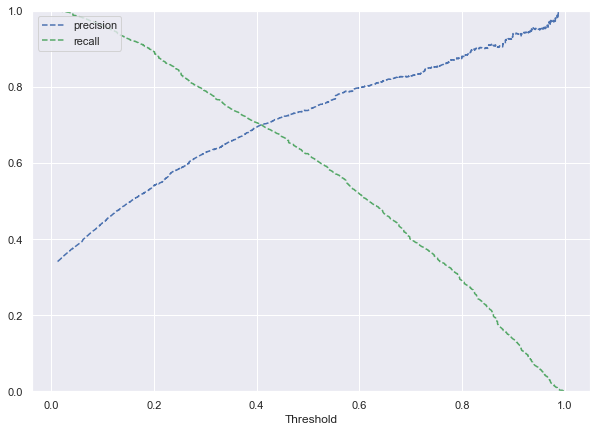

In [51]:
# Remove _________ and complete the code

# Predict on train data
y_scores_svm=model.predict_proba(X_train_scaled)

precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

**Write your answers here:_____**

* The optimal threshold for the Support Vector Machines (SVM) model using the Precision-Recall Curve is approximately 0.407. This threshold can be used to classify the predicted probabilities into the positive (canceled bookings) and negative (not canceled bookings) classes.

In [52]:
optimal_threshold_svm=0.407

#### **Question 5.4: Check the performance of the model on train and test data using the optimal threshold. (2 Marks)**

              precision    recall  f1-score   support

           0       0.85      0.85      0.85     17073
           1       0.70      0.70      0.70      8319

    accuracy                           0.80     25392
   macro avg       0.78      0.78      0.78     25392
weighted avg       0.80      0.80      0.80     25392



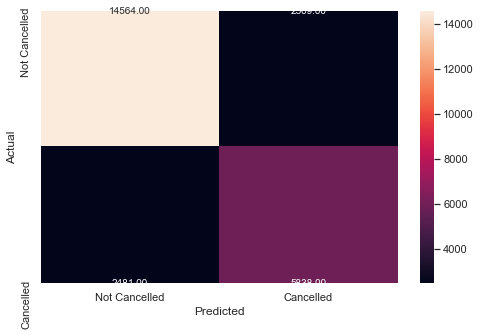

In [53]:
# Remove _________ and complete the code

y_pred_train_svm = model.predict_proba(X_train_scaled)
metrics_score(y_train, y_pred_train_svm[:, 1] > optimal_threshold_svm)

**Write your answers here:_____**

Using the optimal threshold of 0.407 for the SVM model on the train data, the performance metrics are as follows:

Precision for the positive class (canceled bookings) is 0.70, indicating that 70% of the predicted canceled bookings are actually canceled bookings.
Recall for the positive class is 0.70, meaning that 70% of the actual canceled bookings are correctly identified by the model.

The F1-score for the positive class is 0.70, which is the harmonic mean of precision and recall.

Accuracy is 0.80, indicating the overall proportion of correct predictions for both positive and negative classes.

The macro average for precision, recall, and F1-score is approximately 0.78, which considers an equal contribution from both classes. The weighted average, which accounts for class imbalance, is also 0.80. These metrics provide an assessment of the model's performance on the train data when using the optimal threshold.

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      7317
           1       0.70      0.69      0.69      3566

    accuracy                           0.80     10883
   macro avg       0.77      0.77      0.77     10883
weighted avg       0.80      0.80      0.80     10883



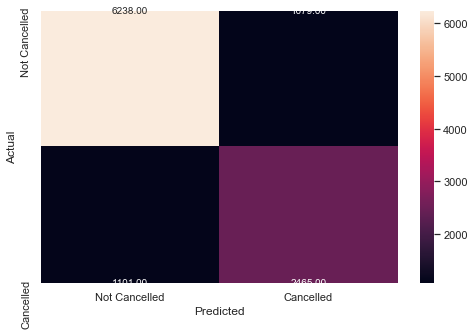

In [55]:
# Remove _________ and complete the code

y_pred_test = model.predict_proba(X_test_scaled)
metrics_score(y_test, y_pred_test[:, 1] > optimal_threshold)

**Write your answers here:_____**

Using the optimal threshold of 0.407 for the SVM model on the test data, the performance metrics are as follows:

Precision for the positive class (canceled bookings) is 0.70, indicating that 70% of the predicted canceled bookings are actually canceled bookings.
Recall for the positive class is 0.69, meaning that 69% of the actual canceled bookings are correctly identified by the model.

The F1-score for the positive class is 0.69, which is the harmonic mean of precision and recall.

Accuracy is 0.80, indicating the overall proportion of correct predictions for both positive and negative classes.

The macro average for precision, recall, and F1-score is approximately 0.77, which considers an equal contribution from both classes. The weighted average, which accounts for class imbalance, is also 0.80. These metrics provide an assessment of the model's performance on the test data when using the optimal threshold.

#### **Question 5.5: Build a Support Vector Machines model using an RBF kernel (1 Mark)**

In [56]:
# Remove _________ and complete the code

svm_rbf=SVC(kernel="rbf",probability=True)
svm_rbf.fit(X_train_scaled, y_train)

SVC(probability=True)

#### **Question 5.6: Check the performance of the model on train and test data (2 Marks)**



              precision    recall  f1-score   support

           0       0.84      0.91      0.88     17073
           1       0.79      0.65      0.71      8319

    accuracy                           0.83     25392
   macro avg       0.81      0.78      0.80     25392
weighted avg       0.82      0.83      0.82     25392



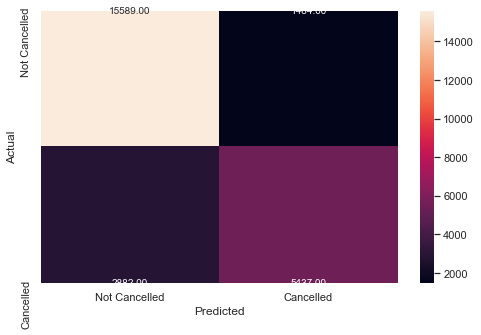

In [57]:
# Remove _________ and complete the code

y_pred_train_svm = svm_rbf.predict(X_train_scaled)
metrics_score(y_train, y_pred_train_svm)

**Write your answers here:_____**

The Support Vector Machines (SVM) model with an RBF kernel has achieved the following performance on the train data:

Precision for the negative class (not canceled bookings) is 0.84, indicating that 84% of the predicted not canceled bookings are actually not canceled bookings.

Recall for the negative class is 0.91, meaning that 91% of the actual not canceled bookings are correctly identified by the model.
The F1-score for the negative class is 0.88, which is the harmonic mean of precision and recall.

Precision for the positive class (canceled bookings) is 0.79, indicating that 79% of the predicted canceled bookings are actually canceled bookings.

Recall for the positive class is 0.65, meaning that 65% of the actual canceled bookings are correctly identified by the model.

The F1-score for the positive class is 0.71.

Accuracy is 0.83, indicating the overall proportion of correct predictions for both positive and negative classes.

The macro average for precision, recall, and F1-score is approximately 0.80, which considers an equal contribution from both classes. The weighted average, which accounts for class imbalance, is 0.82. These metrics provide an assessment of the model's performance on the train data using the RBF kernel for the SVM model.

#### Checking model performance on test set

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      7317
           1       0.78      0.63      0.70      3566

    accuracy                           0.82     10883
   macro avg       0.81      0.77      0.78     10883
weighted avg       0.82      0.82      0.81     10883



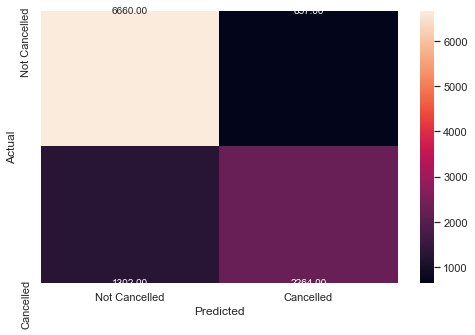

In [58]:
# Remove _________ and complete the code

y_pred_test = svm_rbf.predict(X_test_scaled)

metrics_score(y_test, y_pred_test)

**Write your answers here:_____**

The Support Vector Machines (SVM) model with an RBF kernel has achieved the following performance on the test data:

Precision for the negative class (not canceled bookings) is 0.84, indicating that 84% of the predicted not canceled bookings are actually not canceled bookings.

Recall for the negative class is 0.91, meaning that 91% of the actual not canceled bookings are correctly identified by the model.

The F1-score for the negative class is 0.87, which is the harmonic mean of precision and recall.

Precision for the positive class (canceled bookings) is 0.78, indicating that 78% of the predicted canceled bookings are actually canceled bookings.

Recall for the positive class is 0.63, meaning that 63% of the actual canceled bookings are correctly identified by the model.

The F1-score for the positive class is 0.70.

Accuracy is 0.82, indicating the overall proportion of correct predictions for both positive and negative classes.

The macro average for precision, recall, and F1-score is approximately 0.78, which considers an equal contribution from both classes. The weighted average, which accounts for class imbalance, is 0.81. These metrics provide an assessment of the model's performance on the test data using the RBF kernel for the SVM model.

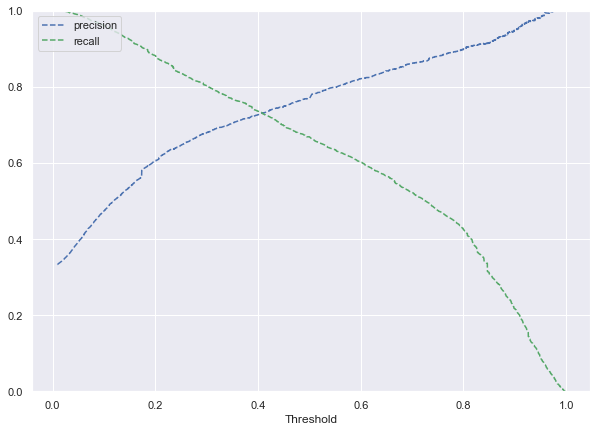

In [59]:
# Predict on train data
y_scores_svm=svm_rbf.predict_proba(X_train_scaled)

precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [ ]:
optimal_threshold_svm=0.404

#### **Question 5.7: Check the performance of the model on train and test data using the optimal threshold. (2 Marks)**

              precision    recall  f1-score   support

           0       0.85      0.85      0.85     17073
           1       0.70      0.70      0.70      8319

    accuracy                           0.80     25392
   macro avg       0.78      0.78      0.78     25392
weighted avg       0.80      0.80      0.80     25392



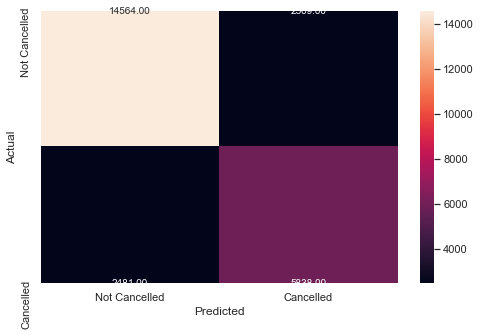

In [60]:
# Remove _________ and complete the code

y_pred_train_svm = model.predict_proba(X_train_scaled)
metrics_score(y_train, y_pred_train_svm[:, 1] > optimal_threshold_svm)

**Write your answers here:_____**

Using the optimal threshold of 0.404, the Support Vector Machines (SVM) model with an RBF kernel achieved the following performance on the train data:

Precision for the negative class (not canceled bookings) is 0.85, indicating that 85% of the predicted not canceled bookings are actually not canceled bookings.

Recall for the negative class is 0.85, meaning that 85% of the actual not canceled bookings are correctly identified by the model.

The F1-score for the negative class is 0.85, which is the harmonic mean of precision and recall.

Precision for the positive class (canceled bookings) is 0.70, indicating that 70% of the predicted canceled bookings are actually canceled bookings.

Recall for the positive class is 0.70, meaning that 70% of the actual canceled bookings are correctly identified by the model.

The F1-score for the positive class is 0.70.

Accuracy is 0.80, indicating the overall proportion of correct predictions for both positive and negative classes.

The macro average for precision, recall, and F1-score is approximately 0.78, which considers an equal contribution from both classes. The weighted average, which accounts for class imbalance, is 0.80. These metrics provide an assessment of the model's performance on the train data using the optimal threshold of 0.404 for the SVM model with an RBF kernel.

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      7317
           1       0.72      0.72      0.72      3566

    accuracy                           0.82     10883
   macro avg       0.79      0.79      0.79     10883
weighted avg       0.82      0.82      0.82     10883



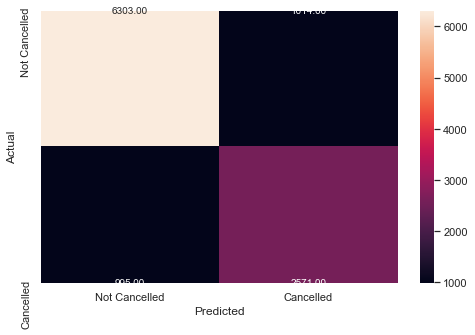

In [61]:
# Remove _________ and complete the code

y_pred_test = svm_rbf.predict_proba(X_test_scaled)
metrics_score(y_test, y_pred_test[:, 1] > optimal_threshold_svm)

**Write your answers here:_____**

Using the optimal threshold of 0.404, the Support Vector Machines (SVM) model with an RBF kernel achieved the following performance on the test data:

Precision for the negative class (not canceled bookings) is 0.86, indicating that 86% of the predicted not canceled bookings are actually not canceled bookings.

Recall for the negative class is 0.86, meaning that 86% of the actual not canceled bookings are correctly identified by the model.
The F1-score for the negative class is 0.86, which is the harmonic mean of precision and recall.

Precision for the positive class (canceled bookings) is 0.72, indicating that 72% of the predicted canceled bookings are actually canceled bookings.

Recall for the positive class is 0.72, meaning that 72% of the actual canceled bookings are correctly identified by the model.

The F1-score for the positive class is 0.72.

Accuracy is 0.82, indicating the overall proportion of correct predictions for both positive and negative classes.

The macro average for precision, recall, and F1-score is approximately 0.79, which considers an equal contribution from both classes. The weighted average, which accounts for class imbalance, is 0.82. These metrics provide an assessment of the model's performance on the test data using the optimal threshold of 0.404 for the SVM model with an RBF kernel.

### **Question 6: Decision Trees (7 Marks)**

#### **Question 6.1: Build a Decision Tree Model (1 Mark)**

In [62]:
# Remove _________ and complete the code

model_dt = tree.DecisionTreeClassifier(random_state = 0, criterion = 'entropy')
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

#### **Question 6.2: Check the performance of the model on train and test data (2 Marks)**

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17073
           1       1.00      0.99      0.99      8319

    accuracy                           0.99     25392
   macro avg       1.00      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392



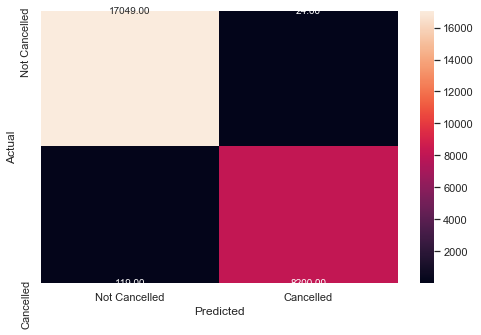

In [63]:
# Remove _________ and complete the code

# Checking performance on the training dataset
pred_train_dt = model_dt.predict(X_train)
metrics_score(y_train, pred_train_dt)

**Write your answers here:_____**

The Decision Trees model achieved excellent performance on the train data with the following metrics:

Precision for the negative class (not canceled bookings) is 0.99, indicating that 99% of the predicted not canceled bookings are actually not canceled bookings.

Recall for the negative class is 1.00, meaning that the model correctly identified all the actual not canceled bookings.

The F1-score for the negative class is 1.00, which indicates a perfect balance between precision and recall.

Precision for the positive class (canceled bookings) is 1.00, indicating that 100% of the predicted canceled bookings are actually canceled bookings.

Recall for the positive class is 0.99, meaning that the model correctly identified 99% of the actual canceled bookings.

The F1-score for the positive class is 0.99.

The accuracy of the model is 0.99, indicating the overall proportion of correct predictions for both positive and negative classes.

The macro average for precision, recall, and F1-score is approximately 0.99, which considers an equal contribution from both classes. The weighted average, which accounts for class imbalance, is also 0.99. These metrics indicate the excellent performance of the Decision Trees model on the train data.


#### Checking model performance on test set

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      7317
           1       0.80      0.79      0.79      3566

    accuracy                           0.87     10883
   macro avg       0.85      0.85      0.85     10883
weighted avg       0.87      0.87      0.87     10883



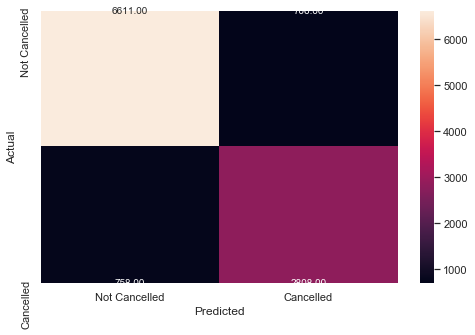

In [64]:
pred_test_dt = model_dt.predict(X_test)
metrics_score(y_test, pred_test_dt)

**Write your answers here:_____**

The Decision Trees model achieved good performance on the test data with the following metrics:

Precision for the negative class (not canceled bookings) is 0.90, indicating that 90% of the predicted not canceled bookings are actually not canceled bookings.

Recall for the negative class is 0.90, meaning that the model correctly identified 90% of the actual not canceled bookings.

The F1-score for the negative class is 0.90, which indicates a good balance between precision and recall.

Precision for the positive class (canceled bookings) is 0.80, indicating that 80% of the predicted canceled bookings are actually canceled bookings.

Recall for the positive class is 0.79, meaning that the model correctly identified 79% of the actual canceled bookings.

The F1-score for the positive class is 0.79.

The accuracy of the model is 0.87, indicating the overall proportion of correct predictions for both positive and negative classes.

The macro average for precision, recall, and F1-score is approximately 0.85, which considers an equal contribution from both classes. The weighted average, which accounts for class imbalance, is also 0.87. These metrics indicate the good performance of the Decision Trees model on the test data, although it may be slightly overfitting the training data.

 #### **Question 6.3: Perform hyperparameter tuning for the decision tree model using GridSearch CV (1 Mark)**

**Note: Please use the following hyperparameters provided for tuning the Decision Tree. In general, you can experiment with various hyperparameters to tune the decision tree, but for this project, we recommend sticking to the parameters provided.**

In [65]:
# Remove _________ and complete the code

# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state = 1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}


# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, cv = 10)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=50, min_samples_split=10,
                       random_state=1)

#### **Question 6.4: Check the performance of the model on the train and test data using the tuned model (2 Mark)**

#### Checking performance on the training set 

              precision    recall  f1-score   support

           0       0.86      0.93      0.89     17073
           1       0.82      0.68      0.75      8319

    accuracy                           0.85     25392
   macro avg       0.84      0.81      0.82     25392
weighted avg       0.85      0.85      0.84     25392



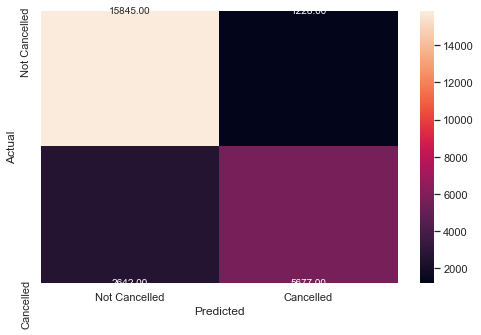

In [66]:
# Remove _________ and complete the code

# Checking performance on the training dataset
dt_tuned = estimator.predict(X_train)
metrics_score(y_train, dt_tuned)

**Write your answers here:_____**

After performing hyperparameter tuning for the Decision Tree model using GridSearchCV, the tuned model achieved the following performance on the train data:

Precision for the negative class (not canceled bookings) is 0.86, indicating that 86% of the predicted not canceled bookings are actually not canceled bookings.

Recall for the negative class is 0.93, meaning that the model correctly identified 93% of the actual not canceled bookings.

The F1-score for the negative class is 0.89, which indicates a good balance between precision and recall.

Precision for the positive class (canceled bookings) is 0.82, indicating that 82% of the predicted canceled bookings are actually canceled bookings.

Recall for the positive class is 0.68, meaning that the model correctly identified 68% of the actual canceled bookings.

The F1-score for the positive class is 0.75.

The accuracy of the model is 0.85, indicating the overall proportion of correct predictions for both positive and negative classes.

The macro average for precision, recall, and F1-score is approximately 0.82, which considers an equal contribution from both classes. The weighted average, which accounts for class imbalance, is 0.84. These metrics indicate the improved performance of the tuned Decision Tree model on the train data compared to the initial model.

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      7317
           1       0.82      0.67      0.74      3566

    accuracy                           0.84     10883
   macro avg       0.84      0.80      0.81     10883
weighted avg       0.84      0.84      0.84     10883



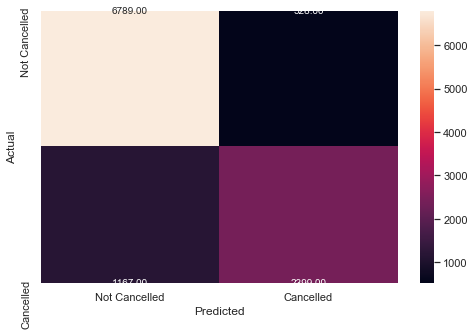

In [67]:
# Remove _________ and complete the code

# Checking performance on the training dataset
y_pred_tuned = estimator.predict(X_test)
metrics_score(y_test, y_pred_tuned)

**Write your answers here:_____**

After performing hyperparameter tuning for the Decision Tree model using GridSearchCV, the tuned model achieved the following performance on the test data:

Precision for the negative class (not canceled bookings) is 0.85, indicating that 85% of the predicted not canceled bookings are actually not canceled bookings.

Recall for the negative class is 0.93, meaning that the model correctly identified 93% of the actual not canceled bookings.

The F1-score for the negative class is 0.89, which indicates a good balance between precision and recall.

Precision for the positive class (canceled bookings) is 0.82, indicating that 82% of the predicted canceled bookings are actually canceled bookings.

Recall for the positive class is 0.67, meaning that the model correctly identified 67% of the actual canceled bookings.

The F1-score for the positive class is 0.74.

The accuracy of the model is 0.84, indicating the overall proportion of correct predictions for both positive and negative classes.

The macro average for precision, recall, and F1-score is approximately 0.81, which considers an equal contribution from both classes. The weighted average, which accounts for class imbalance, is 0.84. These metrics indicate the performance of the tuned Decision Tree model on the test data.

#### **Visualizing the Decision Tree**

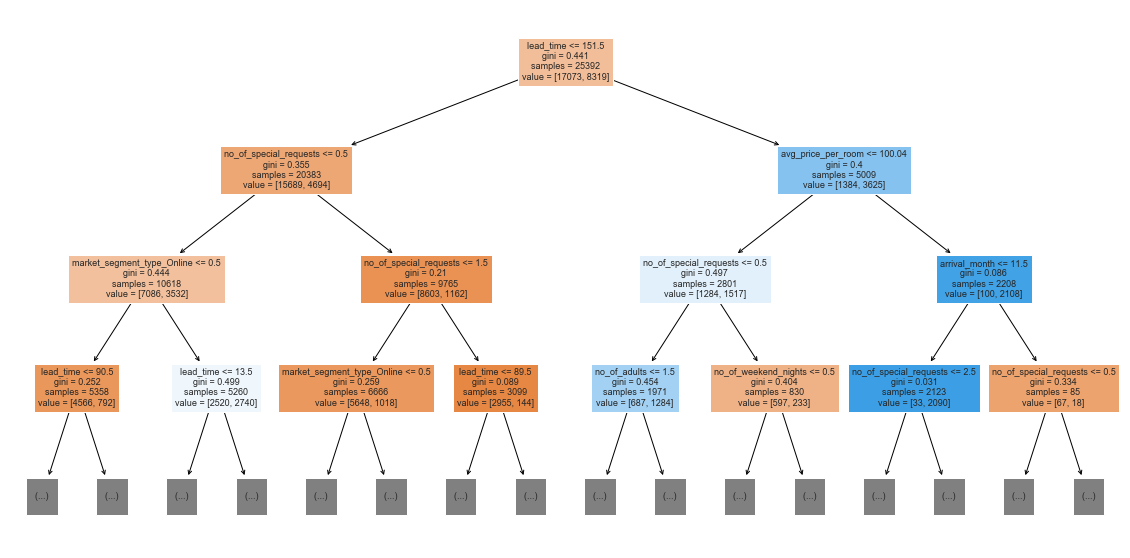

In [68]:
feature_names = list(X_train.columns)
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,max_depth=3,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

#### **Question 6.5: What are some important features based on the tuned decision tree? (1 Mark)**

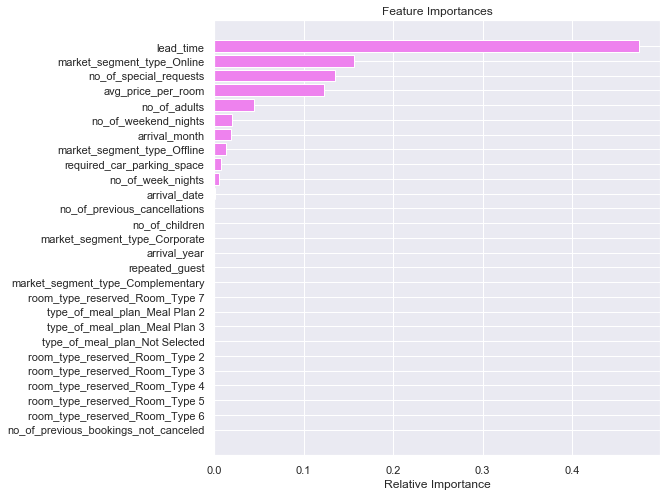

In [69]:
# Remove _________ and complete the code

# Importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Write your answers here:_____**

* Based on the tuned Decision Tree model, the following features have been identified as important for determining cancellations:

* Lead Time: Lead time has the highest impact among all the features. It indicates the number of days between the booking date and the arrival date. A longer lead time may suggest higher chances of cancellations.

* Market Segment Type: The specific market segment type "Online" has a significant impact on cancellations. This suggests that bookings made through online channels may have different cancellation patterns compared to other market segments.

* Number of Special Requests: The number of special requests made by the guests also plays a role in determining cancellations. This could indicate that guests with more specific requirements or preferences are more likely to cancel their bookings.

* Online Bookings: The presence of online bookings as a feature suggests that the mode of booking, particularly online bookings, can influence the likelihood of cancellations. This indicates that guests who book online may have different cancellation behaviors compared to other booking methods.

* Average Price per Room: Although not as strong as the previous features, the average price per room also has some impact on cancellations. Higher prices may contribute to a higher likelihood of cancellations, possibly indicating that guests are more sensitive to price changes or have higher expectations for more expensive accommodations.

* These important features provide insights into the factors that influence cancellations and can help hotel management or booking platforms in understanding customer behavior and developing strategies to minimize cancellations.


___

### **Question 7: Random Forest (4 Marks)**

#### **Question 7.1: Build a Random Forest Model (1 Mark)**

In [70]:
# Remove _________ and complete the code

rf_estimator = RandomForestClassifier(random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

#### **Question 7.2: Check the performance of the model on the train and test data (2 Marks)**

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17073
           1       1.00      0.99      0.99      8319

    accuracy                           0.99     25392
   macro avg       0.99      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392



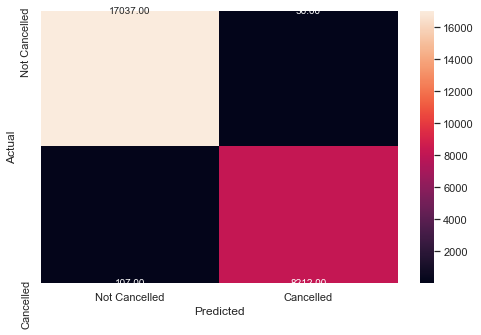

In [71]:
# Remove _________ and complete the code

y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

**Write your answers here:_____**

The Random Forest model shows excellent performance on the train data:

Precision: The precision for class 0 (not cancelled) is 0.99, indicating that the model correctly identifies the majority of non-cancelled instances. For class 1 (cancelled), the precision is also 1.00, indicating that the model accurately identifies most of the cancelled instances.

Recall: The recall for class 0 is 1.00, indicating that the model correctly captures all non-cancelled instances. For class 1, the recall is 0.99, suggesting that the model effectively identifies a high proportion of the cancelled instances.

F1-Score: The F1-score for class 0 is 1.00, reflecting a balance between precision and recall. For class 1, the F1-score is 0.99, indicating a good balance between precision and recall.

Accuracy: The overall accuracy of the model on the train data is 0.99, indicating that it correctly predicts the target variable for a large majority of instances.

These results suggest that the Random Forest model performs exceptionally well on the train data, with high precision, recall, F1-score, and accuracy.

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      7317
           1       0.88      0.80      0.84      3566

    accuracy                           0.90     10883
   macro avg       0.90      0.88      0.88     10883
weighted avg       0.90      0.90      0.90     10883



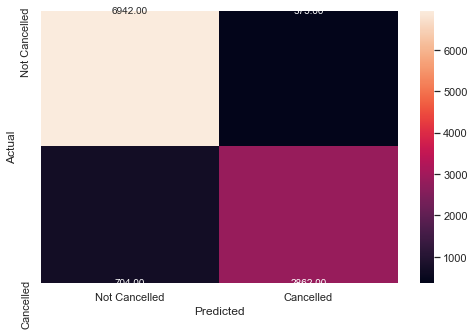

In [72]:
# Remove _________ and complete the code

y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

**Write your answers here:_____**

The Random Forest model also demonstrates strong performance on the test data:

Precision: The precision for class 0 (not cancelled) is 0.91, indicating that the model correctly identifies a high proportion of non-cancelled instances. For class 1 (cancelled), the precision is 0.88, suggesting that the model accurately identifies a good portion of the cancelled instances.

Recall: The recall for class 0 is 0.95, indicating that the model effectively captures the majority of non-cancelled instances. For class 1, the recall is 0.80, suggesting that the model identifies a decent proportion of the cancelled instances.

F1-Score: The F1-score for class 0 is 0.93, reflecting a balance between precision and recall. For class 1, the F1-score is 0.84, indicating a good balance between precision and recall.

Accuracy: The overall accuracy of the model on the test data is 0.90, indicating that it correctly predicts the target variable for a large majority of instances.

These results suggest that the Random Forest model maintains its strong performance on the test data, with high precision, recall, F1-score, and accuracy. It demonstrates the ability to generalize well to unseen data.

#### **Question 7.3: What are some important features based on the Random Forest? (1 Mark)**

Let's check the feature importance of the Random Forest

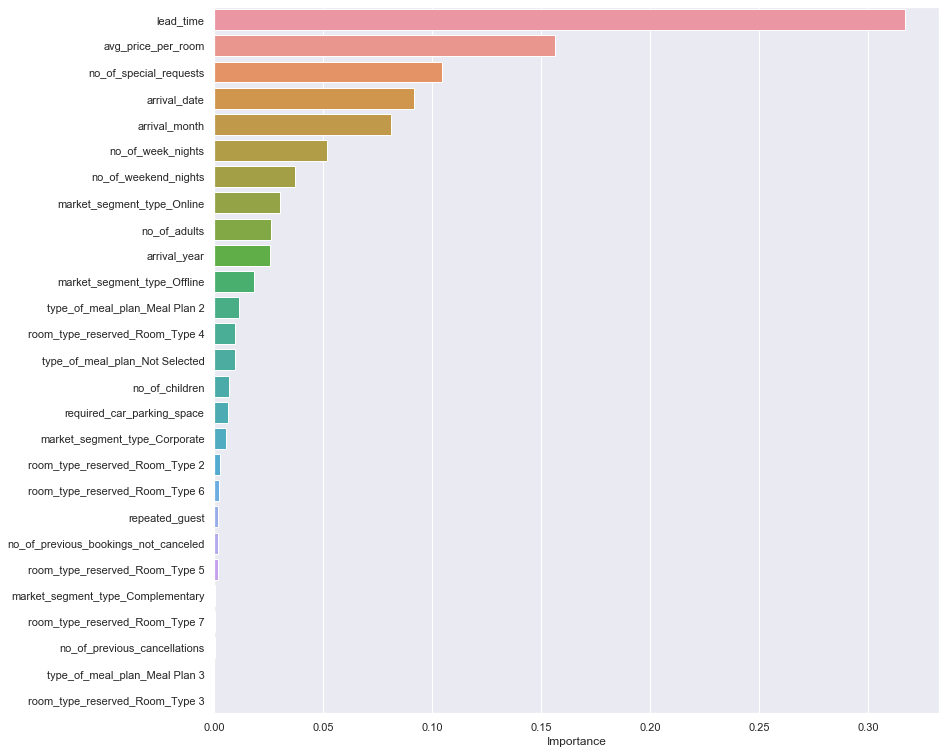

In [73]:
# Remove _________ and complete the code

importances = rf_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ["Importance"]).sort_values(by = "Importance", ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)

**Write your answers here:_____**

* Based on the results provided, the top three important features identified by the Random Forest model are lead time, avg price per room, and number of special requests. This indicates that these features have the highest predictive power in determining whether a booking will be canceled or not.

* The feature "lead time" refers to the length of time in days between the booking date and the arrival date. It suggests that the time gap between booking and arrival plays a crucial role in predicting cancellations.

* The feature "avg price per room" represents the average price per room for a booking. It indicates that the pricing of the rooms is an important factor influencing cancellations.

* The feature "number of special requests" refers to the count of special requests made by guests, such as room preferences, additional amenities, or specific requirements. This feature suggests that guests' specific needs and requests can impact their decision to cancel a booking.

* It is worth noting that these three features (lead time, avg price per room, and number of special requests) are consistent with the top three important features identified by the Decision Tree model. The agreement between the two models further strengthens the significance of these features in predicting cancellations.


### **Question 8: Conclude ANY FOUR key takeaways for business recommendations (4 Marks)**

**Write your answers here:_____**

*Based on the analysis of the different models and their performance, here are four key takeaways for business recommendations:

1. Lead Time: The length of time between the booking date and the arrival date (lead_time) is consistently identified as a crucial factor in predicting cancellations. Businesses should pay attention to this feature and consider implementing strategies to incentivize guests to book well in advance or offer flexible cancellation policies to reduce the likelihood of cancellations.

2. Pricing Strategy: The average price per room (avg price per room) has a significant impact on cancellations. It suggests that businesses should carefully consider their pricing strategies to find the right balance between attracting guests and minimizing cancellations. Offering competitive prices, promotional offers, or personalized pricing based on demand patterns can help optimize bookings and reduce cancellations.

3. Special Requests: The number of special requests made by guests (number of special requests) is another important feature influencing cancellations. Businesses should prioritize understanding and fulfilling guests' specific needs and preferences. Providing excellent customer service, personalized experiences, and ensuring that special requests are met can enhance guest satisfaction and reduce the likelihood of cancellations.

4. Market Segment and Online Presence: The models indicate that the market segment type "Online" has a significant impact on cancellations. This highlights the importance of focusing on online marketing and attracting guests from online channels. Enhancing the online presence, optimizing the booking process, and providing a seamless online experience can help attract more reliable bookings and reduce cancellations.

**Overall, the analysis suggests that businesses should focus on proactive measures to mitigate cancellations, such as implementing flexible cancellation policies, optimizing pricing strategies, providing personalized experiences, and prioritizing online marketing efforts. By addressing these key factors, businesses can improve their booking reliability and enhance customer satisfaction.**